 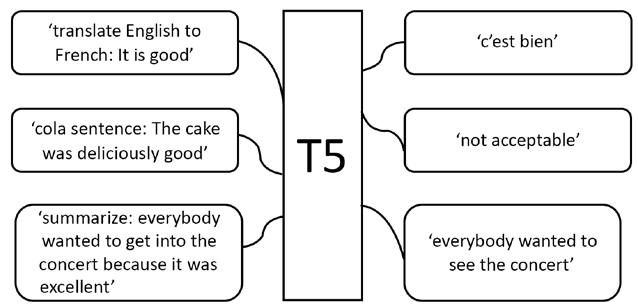

## The T5 model
Raffel et al. (2019) focused on designing a standard input format to obtain text output. The Goo-
gle T5 team did not want to try new architectures derived from the original Transformer, such
as BERT-like encoder-only layers or GPT-like decoder-only layers. Instead, the team focused on
defining NLP tasks in a standard format.

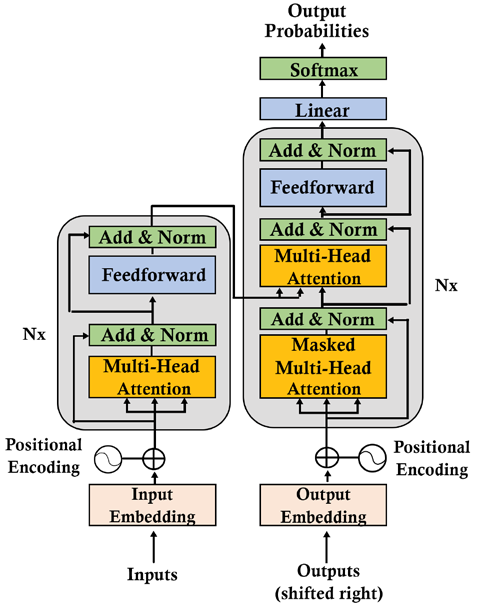

        Figure 8.4: The original Transformer model used by T5

Raffel et al. (2019) kept most of the original Transformer architecture and terms. However, they
emphasized some key aspects. Also, they made some slight vocabulary and functional changes.
The following list contains some of the main aspects of the T5 model:

•The encoder and decoder remain in the model. The encoder and decoder layers become
“blocks,” and the sublayers become “subcomponents” containing a self-attention layer
and a feedforward network. The use of the word “blocks” and “subcomponents” in a
LEGO®-like language allows you to assemble “blocks,” pieces, and components to build
your model. Transformer components are standard building blocks you can assemble in
many ways.

•Self-attention is “order-independent,” meaning it performs operations on sets. Self-attention uses dot products of matrices, not recurrence. It explores
the relationship between each word and the others in a sequence. Positional encoding is
added to the word’s embedding before making the dot products.

•The original Transformer applied sinusoidal and cosine signals to the Transformer. Or it
used learned position embeddings. T5 uses relative position embeddings instead of add-
ing arbitrary positions to the input. In T5, positional encoding relies on an extension of
self-attention to make comparisons between pairwise relationships. 

•Positional embeddings are shared and re-evaluated through all the layers of the model.
We have defined the standardization of the input of the T5 transformer model through the text-
to-text approach.

## Getting started with T5

In [1]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.4 MB/s eta 0:00:004.9 MB/s eta 0:00:01


In [7]:
display_architecture=True

In [2]:
import torch
import json

In [3]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

/home/nitiz/anaconda3/envs/torch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-05-31 16:08:51.275131: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-31 16:08:52.072308: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
model = T5ForConditionalGeneration.from_pretrained('t5-large')
tokenizer = T5Tokenizer.from_pretrained('t5-large')

/home/nitiz/anaconda3/envs/torch/lib/python3.11/site-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [21]:
device = torch.device('cpu')

In [8]:
if display_architecture==True:
    print(model.config)

T5Config {
  "_name_or_path": "t5-large",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "d_ff": 4096,
  "d_kv": 64,
  "d_model": 1024,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 24,
  "num_heads": 16,
  "num_layers": 24,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "summarize: "
    },
    "translation_en_to_de": {
      "early_stopping": true,
      "max_length": 300,
      "num_beams": 4,
      "p

## Summarizing documents with T5-large

In [22]:
def summarize(text, ml):
    preprocess_text = text.strip().replace('\n', "")
    t5_prepared_text = "summarize:" + preprocess_text
    print ("Preprocessed and prepared text: \n", t5_prepared_text)
    
    tokenized_text = tokenizer.encode(t5_prepared_text, return_tensors="pt").to(device)
    
    summary_ids = model.generate(tokenized_text,
                                num_beams = 4,
                                no_repeat_ngram_size = 2,
                                min_length = 30,
                                max_length = ml,
                                early_stopping = True)
    
    output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return output

## A general topic sample

In [23]:
text ="""
The United States Declaration of Independence was the first Etext
released by Project Gutenberg, early in 1971.
The title was stored
in an emailed instruction set which required a tape or diskpack be
hand mounted for retrieval.
The diskpack was the size of a large
cake in a cake carrier, cost $1500, and contained 5 megabytes, of
which this file took 1-2%.
paper tape.
Two tape backups were kept plus one on
The 10,000 files we hope to have online by the end of
2001 should take about 1-2% of a comparably priced drive in 2001.
"""


In [24]:
print("Number of characters:",len(text))
summary=summarize(text,50)
print ("\n\nSummarized text: \n",summary)

Number of characters: 530
Preprocessed and prepared text: 
 summarize:The United States Declaration of Independence was the first Etextreleased by Project Gutenberg, early in 1971.The title was storedin an emailed instruction set which required a tape or diskpack behand mounted for retrieval.The diskpack was the size of a largecake in a cake carrier, cost $1500, and contained 5 megabytes, ofwhich this file took 1-2%.paper tape.Two tape backups were kept plus one onThe 10,000 files we hope to have online by the end of2001 should take about 1-2% of a comparably priced drive in 2001.


Summarized text: 
 the u.s. declaration of independence was the first etext published by project gutenberg. the 10,000 files we hope to have online by the end of2001 should take about 1-2% of a comparably priced drive in 2001


In [25]:
text ="""The law regarding corporations prescribes that a corporation can
be incorporated in the state of Montana to serve any lawful purpose. In
the state of Montana, a corporation has all the powers of a natural person
for carrying out its business activities. The corporation can sue and be
sued in its corporate name. It has perpetual succession. The corporation
can buy, sell or otherwise acquire an interest in a real or personal
property. It can conduct business, carry on operations, and have offices
and exercise the powers in a state, territory or district in possession of
the U.S., or in a foreign country. It can appoint officers and agents of
the corporation for various duties and fix their compensation.
The name of a corporation must contain the word "corporation" or its
abbreviation "corp." The name of a corporation should not be deceptively
similar to the name of another corporation incorporated in the same state.
It should not be deceptively identical to the fictitious name adopted by a
foreign corporation having business transactions in the state.
The corporation is formed by one or more natural persons by executing and
filing articles of incorporation to the secretary of state of filing. The
qualifications for directors are fixed either by articles of incorporation
or bylaws. The names and addresses of the initial directors and purpose
of incorporation should be set forth in the articles of incorporation.
The articles of incorporation should contain the corporate name, the
number of shares authorized to issue, a brief statement of the character
of business carried out by the corporation, the names and addresses of
the directors until successors are elected, and name and addresses of
incorporators. The shareholders have the power to change the size of
board of directors.
"""

In [26]:
print("Number of characters:",len(text))
summary=summarize(text,50)
print ("\n\nSummarized text: \n",summary)

Number of characters: 1804
Preprocessed and prepared text: 
 summarize:The law regarding corporations prescribes that a corporation canbe incorporated in the state of Montana to serve any lawful purpose. Inthe state of Montana, a corporation has all the powers of a natural personfor carrying out its business activities. The corporation can sue and besued in its corporate name. It has perpetual succession. The corporationcan buy, sell or otherwise acquire an interest in a real or personalproperty. It can conduct business, carry on operations, and have officesand exercise the powers in a state, territory or district in possession ofthe U.S., or in a foreign country. It can appoint officers and agents ofthe corporation for various duties and fix their compensation.The name of a corporation must contain the word "corporation" or itsabbreviation "corp." The name of a corporation should not be deceptivelysimilar to the name of another corporation incorporated in the same state.It should not 